In [2]:
import os
import os.path as osp

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import base64
import PIL

from io import BytesIO
from IPython.display import clear_output, Image, display, HTML

def ipython_img(a, fmt='jpeg'):
    f = BytesIO()
    img = PIL.Image.fromarray(a)
    img.save(f, fmt)
    return Image(data=f.getvalue())

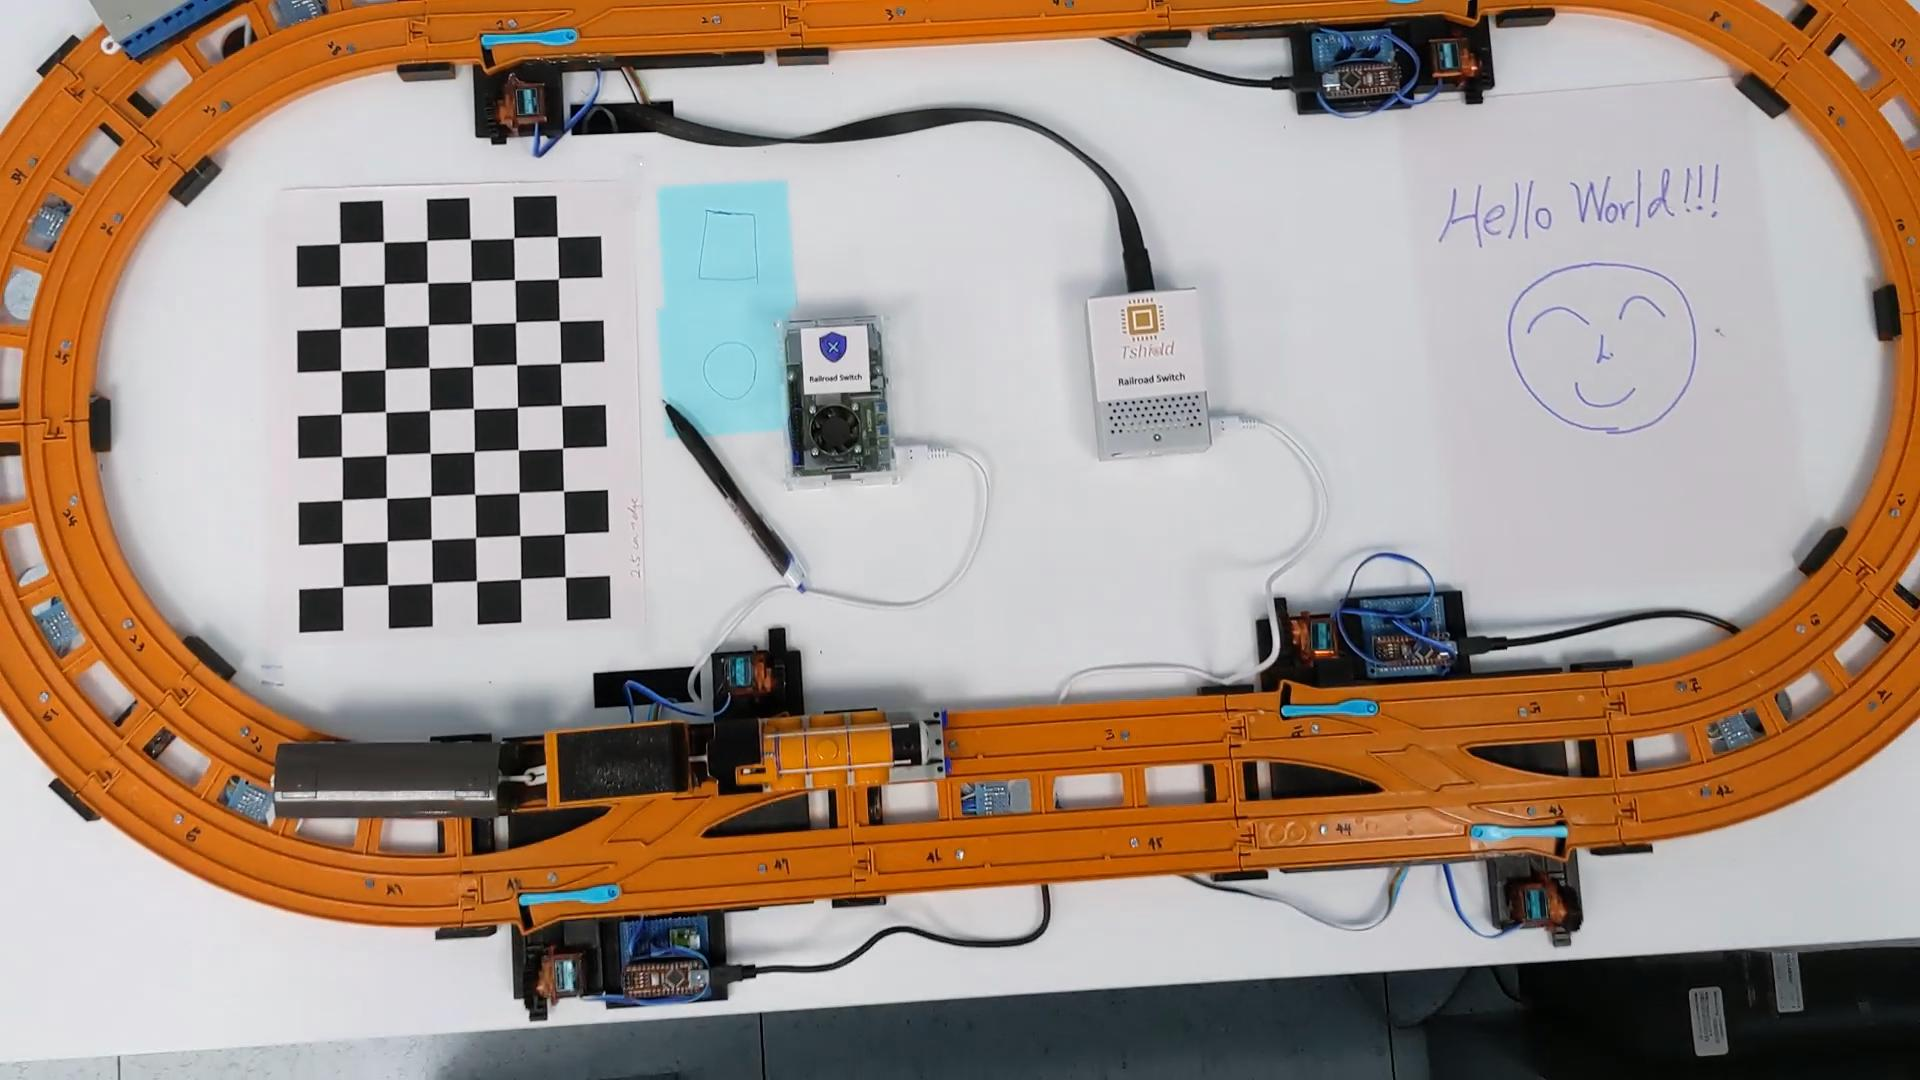

218


In [8]:
cap = cv2.VideoCapture("./videos/VID_20201027_213807.mp4")

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

start_fid = 0
end_fid = total_frames

while True:
    try:
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_fid)
        for fid in range(start_fid, end_fid):   
            print(fid)
            ret, frame = cap.read()
            
            # Show result in jupyter
            img = ipython_img(frame)
            clear_output(wait=True)
            display(img)
  
    except KeyboardInterrupt:
        break

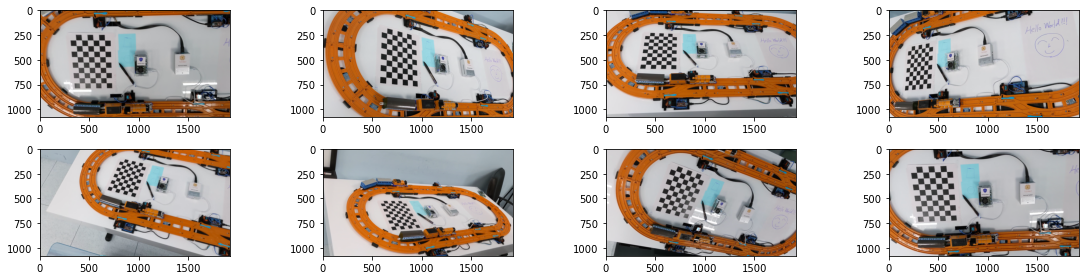

In [25]:
fids = [ [180, 340, 510, 660], [870, 970, 1150, 135] ]

frames = []
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,4))
for i, row in enumerate(fids):
    for j, col in enumerate(row):
        cap.set(cv2.CAP_PROP_POS_FRAMES, col)
        ret, frame = cap.read()
        axes[i][j].imshow(frame)
        frames.append(frame)
        
plt.tight_layout()

In [26]:
for i, frame in enumerate(frames):
    cv2.imwrite('{}.jpg'.format(i), frame)